     ┌───┐     ┌─┐                       
q_0: ┤ H ├─────┤M├───────────────────────
     ├───┤     └╥┘┌─┐                    
q_1: ┤ H ├──────╫─┤M├────────────────────
     ├───┤      ║ └╥┘┌─┐                 
q_2: ┤ H ├──────╫──╫─┤M├─────────────────
     ├───┤      ║  ║ └╥┘┌─┐              
q_3: ┤ H ├──────╫──╫──╫─┤M├──────────────
     ├───┤      ║  ║  ║ └╥┘┌─┐           
q_4: ┤ H ├──────╫──╫──╫──╫─┤M├───────────
     ├───┤      ║  ║  ║  ║ └╥┘     ┌─┐   
q_5: ┤ H ├──────╫──╫──╫──╫──╫───■──┤M├───
     ├───┤┌───┐ ║  ║  ║  ║  ║ ┌─┴─┐└╥┘┌─┐
q_6: ┤ X ├┤ H ├─╫──╫──╫──╫──╫─┤ X ├─╫─┤M├
     └───┘└───┘ ║  ║  ║  ║  ║ └───┘ ║ └╥┘
c: 7/═══════════╩══╩══╩══╩══╩═══════╩══╩═
                0  1  2  3  4       5  6 


/var/folders/50/ggtb162x0bv8psybtq59sjtm0000gn/T/ipykernel_53071/2782906849.py:38: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(assemble(transpiled_circuit))


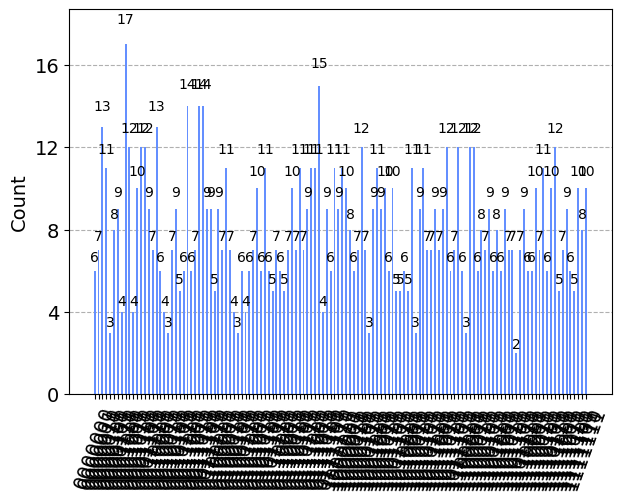

In [20]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer


# Ustawienie liczby kubitów
num_qubits = 7

# Tworzenie obwodu kwantowego z 7 kubitami i 7 klasycznymi bitami do pomiarów
qc = QuantumCircuit(num_qubits, num_qubits)

# Dodawanie bramek Hadamarda do wszystkich kubitów oprócz q6
for qubit in range(num_qubits - 1):
    qc.h(qubit)

# Dodanie bramki X na q6
qc.x(num_qubits - 1)

# Kolejna bramka Hadamarda na q6
qc.h(num_qubits - 1)

# Dodanie CNOTów (q5 jest kontrolą dla q6)
qc.cx(5, 6)

# Kolejne bramki Hadamarda na wszystkich kubitach
# for qubit in range(num_qubits):
#     qc.h(qubit)

# Pomiar wszystkich kubitów
qc.measure(range(num_qubits), range(num_qubits))

# Rysowanie obwodu
print(qc.draw())

# Wykonywanie obwodu na symulatorze
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(qc, simulator)
job = simulator.run(assemble(transpiled_circuit))
result = job.result()
counts = result.get_counts(qc)


#Wyświetlanie histogramu wyników
plot_histogram(counts)